In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, median_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from scipy.stats import *
import h3
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from datetime import datetime
from math import floor
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn

In [2]:
ride_columns = ['accepted_driver_id', 'created_at', 'passenger_id', 'source_lat',
       'source_lng', 'destination_lat', 'destination_lng', 'eta', 'provider',
       'ata', 'id', 'city']

khatkesh_columns = ['ride_id','driver_id','a_t_a_result.arrival_a_t_a','a_t_a_result.boarding_a_t_a','a_t_a_result.ride_a_t_a','a_t_a_result.arrival_probe_result.probe.point.lat','a_t_a_result.arrival_probe_result.probe.point.lon','a_t_a_result.arrival_probe_result.probe.timestamp','a_t_a_result.arrival_probe_result.confidence','a_t_a_result.arrival_probe_result.h3_index', 'a_t_a_result.arrival_probe_result.k_ring_level','a_t_a_result.boarding_probe_result.probe.point.lat','a_t_a_result.boarding_probe_result.probe.point.lon','a_t_a_result.boarding_probe_result.probe.timestamp','a_t_a_result.boarding_probe_result.confidence','a_t_a_result.boarding_probe_result.h3_index','a_t_a_result.boarding_probe_result.k_ring_level','a_t_a_result.final_destination_probe_result.probe.point.lat','a_t_a_result.final_destination_probe_result.probe.point.lon','a_t_a_result.final_destination_probe_result.probe.timestamp','a_t_a_result.final_destination_probe_result.confidence','a_t_a_result.final_destination_probe_result.h3_index','a_t_a_result.final_destination_probe_result.k_ring_level','a_t_a_result.destination_probe_result.probe.point.lat','a_t_a_result.destination_probe_result.probe.point.lon','a_t_a_result.destination_probe_result.probe.timestamp','a_t_a_result.destination_probe_result.confidence','a_t_a_result.destination_probe_result.h3_index','a_t_a_result.destination_probe_result.k_ring_level','a_t_a_result.extra_destination_probe_result.probe.point.lat','a_t_a_result.extra_destination_probe_result.probe.point.lon','a_t_a_result.extra_destination_probe_result.probe.timestamp','a_t_a_result.extra_destination_probe_result.confidence','a_t_a_result.extra_destination_probe_result.h3_index','a_t_a_result.extra_destination_probe_result.k_ring_level','pickup_a_d_d_result.distance','pickup_a_d_d_result.confidence','pickup_a_d_d_result.route_ratio','pickup_a_d_d_result.g_p_s_ratio','ride_a_d_d_result.distance','ride_a_d_d_result.confidence','ride_a_d_d_result.route_ratio','ride_a_d_d_result.g_p_s_ratio','total_a_d_d_confidence','in_ride_allotment','e_d_d','clickhouse_time','hash']

train_dates = ['2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-06', '2022-08-07', '2022-08-08',
               '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12', '2022-08-13', '2022-08-14', '2022-08-15',
               '2022-08-16', '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-20', '2022-08-21', '2022-08-22',
               '2022-08-23', '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29',
               '2022-08-30', '2022-08-31', '2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05',
               '2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-10']

train_holidays = ['2022-08-07', '2022-08-08']

test_dates = ['2022-09-11', '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
              '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
              '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30', '2022-10-01',
              '2022-10-02', '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08',
              '2022-10-09']

test_holidays = ['2022-09-17', '2022-09-25', '2022-09-27', '2022-10-05']

In [3]:
train = pd.read_csv('../rides_train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4063341 entries, 0 to 4063340
Data columns (total 59 columns):
 #   Column                                                       Dtype  
---  ------                                                       -----  
 0   accepted_driver_id                                           int64  
 1   created_at                                                   object 
 2   passenger_id                                                 int64  
 3   source_lat                                                   float64
 4   source_lng                                                   float64
 5   destination_lat                                              float64
 6   destination_lng                                              float64
 7   eta                                                          int64  
 8   provider                                                     object 
 9   ata                                                          int64  

In [4]:
test = pd.read_csv('../rides_test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2729988 entries, 0 to 2729987
Data columns (total 59 columns):
 #   Column                                                       Dtype  
---  ------                                                       -----  
 0   accepted_driver_id                                           int64  
 1   created_at                                                   object 
 2   passenger_id                                                 int64  
 3   source_lat                                                   float64
 4   source_lng                                                   float64
 5   destination_lat                                              float64
 6   destination_lng                                              float64
 7   eta                                                          int64  
 8   provider                                                     object 
 9   ata                                                          int64  

In [5]:
train_p4 = train[train['eta'] >= 1800]
train_p4

,accepted_driver_id,created_at,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,provider,ata,...,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,clickhouse_time,hash
1,1630622,2022-08-02 21:19:50,24944157,35.753071,51.364353,35.801231,51.452614,1886,smapp-same-dc,1678,...,0.005714,28.000000,0.973821,0.0,0.840000,0.978096,0.0,0.000000,2022-08-02 21:54:54,17518631764082474900
16,1733850,2022-08-02 18:48:21,18113917,35.801170,51.417953,35.774540,51.331562,2204,smapp-same-dc,2581,...,0.003676,13.838000,0.617575,0.0,0.102941,0.684035,0.0,0.000000,2022-08-02 19:40:51,6718141937521421034
21,2942776,2022-08-02 20:09:35,15340963,35.617275,51.488651,35.724304,51.501282,2083,smapp-same-dc,1833,...,0.005525,33.257999,0.966835,0.0,0.878453,0.971940,0.0,0.000000,2022-08-02 20:45:39,9118069446153719521
40,2731688,2022-08-02 20:55:26,2043592,35.759720,51.262569,35.725605,51.444698,2185,smapp-same-dc,2293,...,0.004405,43.938831,0.976005,0.0,0.973568,0.979931,0.0,0.000000,2022-08-02 21:43:43,4640629599265281559
41,558365,2022-08-02 10:07:26,38602549,35.544151,51.222370,35.753899,51.145321,2532,smapp-same-dc,2571,...,0.003413,47.014339,0.495764,0.0,0.071672,0.496288,0.0,0.000000,2022-08-02 10:55:30,15347317208377558354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4063308,4100368,2022-09-10 08:43:43,23085905,35.686737,51.378422,35.766529,51.479244,1903,smapp-same-dc,2247,...,0.004386,30.699947,0.897787,0.0,0.951754,0.912274,0.0,20.017000,2022-09-10 09:34:47,6285336365528391845
4063311,2360511,2022-09-10 00:53:09,24484463,35.667233,51.344719,35.846325,51.005749,2427,smapp-same-dc,2220,...,0.003953,52.319000,0.652545,0.0,0.162055,0.698573,0.0,44.632999,2022-09-10 01:38:42,5982922617154083351
4063332,2779592,2022-09-10 15:04:43,43527985,35.588966,51.422379,35.733543,51.345242,1969,smapp-same-dc,2221,...,0.004444,40.393002,0.519409,0.0,0.066667,0.532460,0.0,28.209999,2022-09-10 15:50:30,16403387582631044042
4063336,3629,2022-09-10 10:59:52,28110479,35.683701,51.372459,35.799290,51.477062,2052,smapp-same-dc,2532,...,0.003021,22.107664,0.439463,0.0,0.063444,0.501275,0.0,24.957001,2022-09-10 12:05:12,4744731905255557123


In [6]:
test_p4 = test[test['eta'] >= 1800]
test_p4

,accepted_driver_id,created_at,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,provider,ata,...,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,clickhouse_time,hash
6,276394,2022-09-11 12:25:04,1130420,35.780571,51.356174,35.628082,51.351501,1894,smapp-same-dc,1963,...,0.005051,25.871000,0.558019,0.0,0.146465,0.610596,0.000,25.691999,2022-09-11 13:00:48,9344030596630141528
17,3564404,2022-09-11 20:54:38,20882457,35.640404,51.416351,35.768814,51.276939,2944,smapp-same-dc,2778,...,0.003559,65.590630,0.834837,0.0,0.868327,0.857004,0.000,40.091000,2022-09-11 22:09:37,13862046135803300111
20,2972216,2022-09-11 07:07:26,41413761,35.356205,51.641312,35.601074,51.435585,2472,smapp-same-dc,2877,...,0.003610,40.578999,0.546872,0.0,0.104693,0.609309,0.000,38.662998,2022-09-11 08:02:38,5652449490027755269
23,4288367,2022-09-11 22:03:11,47543504,35.351887,51.645844,35.599098,51.442066,2364,smapp-same-dc,2719,...,0.004000,65.080360,0.888148,0.0,0.896000,0.906676,0.000,38.363998,2022-09-11 23:02:15,9004574699344913211
24,785560,2022-09-11 09:02:41,21514168,35.720486,51.309761,35.796368,51.514473,2362,smapp-same-dc,2410,...,0.004425,27.839001,0.568824,0.0,0.092920,0.653371,0.000,28.323000,2022-09-11 09:50:47,17365459658581884520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729963,983182,2022-10-09 14:43:23,20553284,35.721123,51.510109,35.521900,51.249054,2660,smapp-same-dc,6153,...,0.001706,128.636993,0.981323,0.0,0.998294,0.983652,0.000,43.882999,2022-10-09 16:35:42,11470021632531286296
2729966,35629,2022-10-09 15:54:14,3406353,35.764214,51.475269,35.750290,51.286972,2004,smapp-same-dc,3809,...,0.002632,40.758999,0.984237,0.0,0.984211,0.986524,0.000,19.643000,2022-10-09 17:08:56,5916495388916790202
2729968,4373409,2022-10-09 12:37:31,2737984,35.775448,51.384750,35.719559,51.607353,2170,smapp-same-dc,2953,...,0.003378,52.777908,0.911451,0.0,0.891892,0.924451,1.448,29.955999,2022-10-09 13:36:01,12320934774556909350
2729976,4180315,2022-10-09 09:28:07,38218151,35.735134,51.420135,35.485798,51.686787,3134,smapp-same-dc,4588,...,0.002364,85.375381,0.988441,0.0,0.978723,0.989872,0.000,43.558998,2022-10-09 10:55:43,11953691384932500369


There are some duplicates in the data

In [7]:
train_p4 = train_p4.drop_duplicates(subset=['ride_id', 'ata'])
len(train_p4)

514839

In [8]:
test_p4 = test_p4.drop_duplicates(subset=['ride_id', 'ata'])
len(test_p4)

332061

In [9]:
train_p4 = train_p4[(train_p4['eta'] < 10800) &
                                (train_p4['a_t_a_result.ride_a_t_a'] > 180) &
                                (train_p4['a_t_a_result.ride_a_t_a'] < 10800)]
train_p4.describe()

,accepted_driver_id,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,ata,ride_id,city,...,pickup_a_d_d_result.route_ratio,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,hash
count,5.132660e+05,5.132660e+05,513266.000000,513266.000000,513266.000000,513266.000000,513266.000000,513266.000000,5.132660e+05,513266.0,...,513266.000000,513266.000000,513266.000000,513266.000000,513266.000000,513266.000000,513266.000000,513266.000000,513266.000000,5.132660e+05
mean,2.052076e+06,2.542970e+07,35.682093,51.396489,35.693895,51.340904,2496.019686,2995.289856,4.827573e+09,1.0,...,0.000193,0.003340,51.976315,0.824027,0.000012,0.698335,0.835393,0.055390,8.390746,9.217479e+18
std,1.384086e+06,1.822361e+07,0.104089,0.152049,0.107322,0.205802,694.146171,1170.603664,5.961566e+07,0.0,...,0.011157,0.001517,28.525724,0.168117,0.000284,0.331778,0.160291,1.149136,16.564012,5.325390e+18
min,0.000000e+00,1.100000e+01,35.186329,50.900448,33.992180,49.698254,1800.000000,206.000000,4.714479e+09,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.162610e+12
25%,6.983410e+05,6.466300e+06,35.641220,51.321495,35.654217,51.243610,2002.000000,2225.000000,4.778560e+09,1.0,...,0.000000,0.002564,33.532001,0.711429,0.000000,0.460481,0.737998,0.000000,0.000000,4.606262e+18
50%,2.115911e+06,2.626258e+07,35.713772,51.402451,35.717728,51.387814,2286.000000,2716.000000,4.829735e+09,1.0,...,0.000000,0.003472,46.855902,0.890067,0.000000,0.860759,0.896658,0.000000,0.000000,9.217168e+18
75%,3.293086e+06,4.086694e+07,35.754856,51.461155,35.759948,51.454262,2767.000000,3456.000000,4.874188e+09,1.0,...,0.000000,0.004329,64.639000,0.959883,0.000000,0.964758,0.962513,0.000000,12.464750,1.382594e+19
max,4.330826e+06,5.737685e+07,35.839874,52.794945,36.656895,53.376816,10528.000000,28079.000000,4.933844e+09,1.0,...,1.000000,0.045455,8428.820312,1.000000,0.023997,1.000000,1.000000,732.436646,192.143997,1.844667e+19


In [10]:
train_p4 = train_p4[(train_p4['a_t_a_result.destination_probe_result.confidence'] > 0) & (train_p4['a_t_a_result.boarding_probe_result.confidence'] > 0)]
train_p4.describe()

,accepted_driver_id,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,ata,ride_id,city,...,pickup_a_d_d_result.route_ratio,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,hash
count,3.005900e+05,3.005900e+05,300590.000000,300590.000000,300590.000000,300590.000000,300590.000000,300590.000000,3.005900e+05,300590.0,...,300590.000000,300590.000000,300590.000000,300590.000000,300590.000000,300590.000000,300590.000000,300590.000000,300590.000000,3.005900e+05
mean,2.090127e+06,2.514243e+07,35.681823,51.395616,35.696726,51.338996,2486.910027,3019.860025,4.827441e+09,1.0,...,0.000100,0.003735,54.267730,0.867368,0.000007,0.795466,0.879437,0.059098,8.480502,9.220756e+18
std,1.390057e+06,1.817933e+07,0.103246,0.150645,0.105668,0.206233,680.419884,1167.588165,5.967997e+07,0.0,...,0.007807,0.001130,29.873212,0.143336,0.000211,0.267691,0.129902,0.546860,16.585314,5.328382e+18
min,9.000000e+00,3.900000e+01,35.186329,50.900448,33.992180,49.698254,1800.000000,206.000000,4.714479e+09,1.0,...,0.000000,0.000639,0.000000,0.000000,0.000000,0.002597,0.000000,0.000000,0.000000,2.381146e+13
25%,7.344300e+05,6.178774e+06,35.640427,51.320942,35.657173,51.240823,2000.000000,2252.000000,4.778458e+09,1.0,...,0.000000,0.002933,35.993999,0.811881,0.000000,0.730630,0.830110,0.000000,0.000000,4.599420e+18
50%,2.172354e+06,2.581722e+07,35.712662,51.401926,35.720802,51.385429,2281.000000,2740.000000,4.829144e+09,1.0,...,0.000000,0.003704,49.177559,0.922584,0.000000,0.920732,0.928255,0.000000,0.000000,9.228543e+18
75%,3.346744e+06,4.037015e+07,35.754234,51.460594,35.761931,51.455318,2756.000000,3475.000000,4.874889e+09,1.0,...,0.000000,0.004484,66.921204,0.971709,0.000000,0.978814,0.973644,0.000000,13.287000,1.383482e+19
max,4.329674e+06,5.737685e+07,35.839859,52.792675,36.648926,53.376816,10050.000000,21433.000000,4.933844e+09,1.0,...,1.000000,0.045455,8428.820312,1.000000,0.021793,1.000000,1.000000,24.836000,192.143997,1.844667e+19


In [11]:
test_p4 = test_p4[test_p4['eta'] < 10800]

In [12]:
test_p4 = test_p4[(test_p4['a_t_a_result.destination_probe_result.confidence'] > 0) & (test_p4['a_t_a_result.boarding_probe_result.confidence'] > 0)]
test_p4.describe()

,accepted_driver_id,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,ata,ride_id,city,...,pickup_a_d_d_result.route_ratio,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,hash
count,1.953600e+05,1.953600e+05,195360.000000,195360.000000,195360.000000,195360.000000,195360.000000,195360.000000,1.953600e+05,195360.0,...,195360.000000,195360.000000,195360.000000,195360.000000,195360.000000,195360.000000,195360.000000,195360.000000,195360.000000,1.953600e+05
mean,2.139469e+06,2.583420e+07,35.675916,51.396343,35.692138,51.334464,2508.695874,3076.418515,5.011913e+09,1.0,...,0.000055,0.003731,56.923652,0.869934,0.000006,0.810518,0.881741,0.020453,34.204856,9.234726e+18
std,1.422076e+06,1.841180e+07,0.106800,0.157862,0.113097,0.216631,704.423363,1312.656665,4.444763e+07,0.0,...,0.004800,0.001191,26.951837,0.143132,0.000169,0.266531,0.129500,0.267203,17.218847,5.331731e+18
min,4.300000e+01,2.130000e+02,35.189159,50.900494,33.983345,49.689377,1800.000000,347.000000,4.933927e+09,1.0,...,0.000000,0.000428,2.235000,0.000000,0.000000,0.002063,0.000000,0.000000,1.485000,4.035099e+13
25%,7.571800e+05,6.708485e+06,35.632419,51.316971,35.650723,51.221844,2004.000000,2235.750000,4.973141e+09,1.0,...,0.000000,0.002882,37.938000,0.815446,0.000000,0.768061,0.832882,0.000000,21.618750,4.596387e+18
50%,2.205670e+06,2.690674e+07,35.707644,51.401264,35.718204,51.380756,2296.000000,2744.000000,5.013574e+09,1.0,...,0.000000,0.003704,51.812128,0.926238,0.000000,0.936782,0.931694,0.000000,30.615000,9.265194e+18
75%,3.420708e+06,4.133328e+07,35.752201,51.464753,35.760426,51.457687,2794.000000,3534.000000,5.051772e+09,1.0,...,0.000000,0.004525,70.071522,0.974197,0.000000,0.984190,0.975832,0.000000,43.045249,1.386457e+19
max,4.421542e+06,5.813654e+07,35.839844,52.796974,36.715931,53.440346,10751.000000,21204.000000,5.083611e+09,1.0,...,1.000000,0.035714,417.749268,1.000000,0.021603,1.000000,1.000000,51.702080,290.472992,1.844673e+19


In [13]:
train_p4 = train_p4[['eta', 'ata', 'a_t_a_result.ride_a_t_a', 'created_at', 'source_lat', 'source_lng', 'destination_lat', 'destination_lng', 'e_d_d', 'clickhouse_time']]
train_p4

,eta,ata,a_t_a_result.ride_a_t_a,created_at,source_lat,source_lng,destination_lat,destination_lng,e_d_d,clickhouse_time
21,2083,1833,1808,2022-08-02 20:09:35,35.617275,51.488651,35.724304,51.501282,0.000000,2022-08-02 20:45:39
40,2185,2293,2265,2022-08-02 20:55:26,35.759720,51.262569,35.725605,51.444698,0.000000,2022-08-02 21:43:43
58,2273,2305,2260,2022-08-02 20:00:03,35.721745,51.335915,35.767059,51.456818,0.000000,2022-08-02 20:48:05
74,2142,2144,2041,2022-08-02 07:47:16,35.673149,51.405518,35.746445,51.447365,0.000000,2022-08-02 08:30:58
85,2027,2028,1996,2022-08-02 21:34:16,35.751251,51.815495,35.749458,51.518780,0.000000,2022-08-02 22:20:48
...,...,...,...,...,...,...,...,...,...,...
4063236,2142,2065,2084,2022-09-10 09:14:13,35.737068,51.293900,35.790359,51.493561,27.850000,2022-09-10 10:00:34
4063306,1824,1795,1785,2022-09-10 17:27:22,35.768711,51.768398,35.749062,51.517361,32.625000,2022-09-10 18:05:34
4063308,1903,2247,2276,2022-09-10 08:43:43,35.686737,51.378422,35.766529,51.479244,20.017000,2022-09-10 09:34:47
4063332,1969,2221,2245,2022-09-10 15:04:43,35.588966,51.422379,35.733543,51.345242,28.209999,2022-09-10 15:50:30


In [14]:
test_p4 = test_p4[['eta', 'ata', 'a_t_a_result.ride_a_t_a', 'created_at', 'source_lat', 'source_lng', 'destination_lat', 'destination_lng', 'e_d_d', 'clickhouse_time']]
test_p4

,eta,ata,a_t_a_result.ride_a_t_a,created_at,source_lat,source_lng,destination_lat,destination_lng,e_d_d,clickhouse_time
20,2472,2877,2762,2022-09-11 07:07:26,35.356205,51.641312,35.601074,51.435585,38.662998,2022-09-11 08:02:38
23,2364,2719,2491,2022-09-11 22:03:11,35.351887,51.645844,35.599098,51.442066,38.363998,2022-09-11 23:02:15
24,2362,2410,2258,2022-09-11 09:02:41,35.720486,51.309761,35.796368,51.514473,28.323000,2022-09-11 09:50:47
28,2436,2816,3452,2022-09-11 14:17:32,35.635067,51.381229,35.780197,51.467113,30.767000,2022-09-11 15:24:33
36,2132,2491,2592,2022-09-11 12:36:45,35.774742,51.369663,35.672554,51.479824,29.271000,2022-09-11 13:26:27
...,...,...,...,...,...,...,...,...,...,...
2729960,2190,5258,5217,2022-10-09 06:55:00,35.628559,51.404385,35.796116,51.475918,25.430000,2022-10-09 09:37:49
2729963,2660,6153,5852,2022-10-09 14:43:23,35.721123,51.510109,35.521900,51.249054,43.882999,2022-10-09 16:35:42
2729966,2004,3809,3793,2022-10-09 15:54:14,35.764214,51.475269,35.750290,51.286972,19.643000,2022-10-09 17:08:56
2729968,2170,2953,2956,2022-10-09 12:37:31,35.775448,51.384750,35.719559,51.607353,29.955999,2022-10-09 13:36:01


In [15]:
train_p4['hour'] = train_p4.apply(lambda row: ((datetime.timestamp(datetime.strptime(row.created_at,"%Y-%m-%d %H:%M:%S")) - 1662147000) % 604800) / 3600, axis=1)
train_p4['holiday'] = train_p4.apply(lambda row: int(row.created_at.split()[0] in train_holidays), axis=1)
train_p4

,eta,ata,a_t_a_result.ride_a_t_a,created_at,source_lat,source_lng,destination_lat,destination_lng,e_d_d,clickhouse_time,hour,holiday
21,2083,1833,1808,2022-08-02 20:09:35,35.617275,51.488651,35.724304,51.501282,0.000000,2022-08-02 20:45:39,92.159722,0
40,2185,2293,2265,2022-08-02 20:55:26,35.759720,51.262569,35.725605,51.444698,0.000000,2022-08-02 21:43:43,92.923889,0
58,2273,2305,2260,2022-08-02 20:00:03,35.721745,51.335915,35.767059,51.456818,0.000000,2022-08-02 20:48:05,92.000833,0
74,2142,2144,2041,2022-08-02 07:47:16,35.673149,51.405518,35.746445,51.447365,0.000000,2022-08-02 08:30:58,79.787778,0
85,2027,2028,1996,2022-08-02 21:34:16,35.751251,51.815495,35.749458,51.518780,0.000000,2022-08-02 22:20:48,93.571111,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4063236,2142,2065,2084,2022-09-10 09:14:13,35.737068,51.293900,35.790359,51.493561,27.850000,2022-09-10 10:00:34,9.236944,0
4063306,1824,1795,1785,2022-09-10 17:27:22,35.768711,51.768398,35.749062,51.517361,32.625000,2022-09-10 18:05:34,17.456111,0
4063308,1903,2247,2276,2022-09-10 08:43:43,35.686737,51.378422,35.766529,51.479244,20.017000,2022-09-10 09:34:47,8.728611,0
4063332,1969,2221,2245,2022-09-10 15:04:43,35.588966,51.422379,35.733543,51.345242,28.209999,2022-09-10 15:50:30,15.078611,0


In [16]:
test_p4['hour'] = test_p4.apply(lambda row: ((datetime.timestamp(datetime.strptime(row.created_at,"%Y-%m-%d %H:%M:%S")) - 1662147000) % 604800) / 3600, axis=1)
test_p4['holiday'] = test_p4.apply(lambda row: int(row.created_at.split()[0] in test_holidays), axis=1)
test_p4

,eta,ata,a_t_a_result.ride_a_t_a,created_at,source_lat,source_lng,destination_lat,destination_lng,e_d_d,clickhouse_time,hour,holiday
20,2472,2877,2762,2022-09-11 07:07:26,35.356205,51.641312,35.601074,51.435585,38.662998,2022-09-11 08:02:38,31.123889,0
23,2364,2719,2491,2022-09-11 22:03:11,35.351887,51.645844,35.599098,51.442066,38.363998,2022-09-11 23:02:15,46.053056,0
24,2362,2410,2258,2022-09-11 09:02:41,35.720486,51.309761,35.796368,51.514473,28.323000,2022-09-11 09:50:47,33.044722,0
28,2436,2816,3452,2022-09-11 14:17:32,35.635067,51.381229,35.780197,51.467113,30.767000,2022-09-11 15:24:33,38.292222,0
36,2132,2491,2592,2022-09-11 12:36:45,35.774742,51.369663,35.672554,51.479824,29.271000,2022-09-11 13:26:27,36.612500,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2729960,2190,5258,5217,2022-10-09 06:55:00,35.628559,51.404385,35.796116,51.475918,25.430000,2022-10-09 09:37:49,31.916667,0
2729963,2660,6153,5852,2022-10-09 14:43:23,35.721123,51.510109,35.521900,51.249054,43.882999,2022-10-09 16:35:42,39.723056,0
2729966,2004,3809,3793,2022-10-09 15:54:14,35.764214,51.475269,35.750290,51.286972,19.643000,2022-10-09 17:08:56,40.903889,0
2729968,2170,2953,2956,2022-10-09 12:37:31,35.775448,51.384750,35.719559,51.607353,29.955999,2022-10-09 13:36:01,37.625278,0


In [17]:
train_p4_geo_x = train_p4[["eta", "source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]
train_p4_geo_y = train_p4["a_t_a_result.ride_a_t_a"]

In [18]:
test_p4_geo_x = test_p4[["eta", "source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]
test_p4_geo_y = test_p4["a_t_a_result.ride_a_t_a"]

In [20]:
outlier_detector_train_p4_x = train_p4_geo_x[["source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]
outlier_detector_test_p4_x = test_p4_geo_x[["source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]

In [28]:
outlier_detector_train_p4_x_normalized = (outlier_detector_train_p4_x - outlier_detector_train_p4_x.min()) / (outlier_detector_train_p4_x.max() - outlier_detector_train_p4_x.min())
train_p4_y_normalized = (train_p4_geo_y - train_p4_geo_y.min()) / (train_p4_geo_y.max() - train_p4_geo_y.min())

test_p4_x_normalized = (outlier_detector_test_p4_x - outlier_detector_train_p4_x.min()) / (outlier_detector_train_p4_x.max() - outlier_detector_train_p4_x.min())
test_p4_y_normalized = (test_p4_geo_y - train_p4_geo_y.min()) / (train_p4_geo_y.max() - train_p4_geo_y.min())

In [34]:
from sklearn.neural_network import MLPRegressor
import seaborn as sns

In [30]:
outlier_detector = MLPRegressor(random_state=73, max_iter=500).fit(outlier_detector_train_p4_x_normalized, train_p4_y_normalized)

In [31]:
train_pred_normalized = outlier_detector.predict(outlier_detector_train_p4_x_normalized)
test_pred_normalized = outlier_detector.predict(test_p4_x_normalized)

In [32]:
eta = train_p4_geo_x['eta']
outlier_detector_y = train_pred_normalized * (train_p4_geo_y.max() - train_p4_geo_y.min()) + train_p4_geo_y.min()
distance = outlier_detector_y - eta

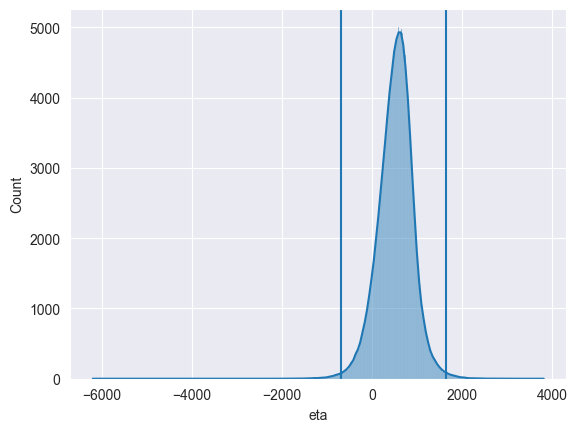

In [35]:
graph = sns.histplot(data=distance, kde=True)
graph.axvline(1638)
graph.axvline(-683)

In [36]:
inside_eta = train_p4_geo_x['eta'][(distance > -3500) & (distance < 3500)]
inside_ata = train_p4_geo_y[(distance > -3500) & (distance < 3500)]

outside_eta = train_p4_geo_x['eta'][(distance < -3500) | (distance > 3500)]
outside_ata = train_p4_geo_y[(distance < -3500) | (distance > 3500)]

<AxesSubplot: xlabel='eta', ylabel='a_t_a_result.ride_a_t_a'>

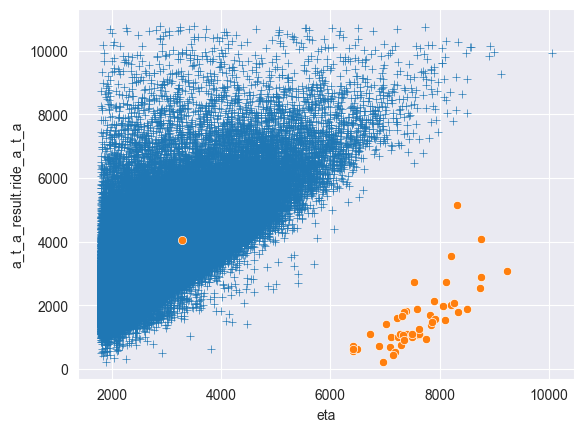

In [37]:
sns.scatterplot(x=inside_eta, y=inside_ata, marker="+")
sns.scatterplot(x=outside_eta, y=outside_ata, marker="o")

In [38]:
train_inside_x = train_p4_geo_x[(distance > -3500) & (distance < 3500)]
train_inside_y = train_p4_geo_y[(distance > -3500) & (distance < 3500)]

In [40]:
test_outlier_detector_y = test_pred_normalized * (train_p4_geo_y.max() - train_p4_geo_y.min()) + train_p4_geo_y.min()
test_distance = test_outlier_detector_y - test_p4_geo_x['eta']

In [41]:
test_inside_x = test_p4_geo_x[(test_distance > -3500) & (test_distance < 3500)]
test_inside_y = test_p4_geo_y[(test_distance > -3500) & (test_distance < 3500)]

In [42]:
reg_geo_p4 = LinearRegression().fit(train_inside_x, train_inside_y)

In [43]:
print(reg_geo_p4.coef_)
print(reg_geo_p4.intercept_)

[ 1.23731331e+00  6.78416676e+02  7.92948376e+01  5.81052367e+02
  2.24521595e+02 -5.39372111e-01 -2.08413176e+02]
-60620.601050284255


In [44]:
train_pred_geo = reg_geo_p4.predict(train_inside_x)
test_pred_geo = reg_geo_p4.predict(test_inside_x)

In [46]:
print("ETA train MAE", mean_absolute_error(train_inside_y, train_inside_x['eta']))
print("prediction train MAE", mean_absolute_error(train_inside_y, train_pred_geo))

print("ETA test MAE ", mean_absolute_error(test_inside_y, test_inside_x['eta']))
print("prediction test MAE", mean_absolute_error(test_inside_y, test_pred_geo))


print("ETA train MSE", mean_squared_error(train_inside_y, train_inside_x['eta']))
print("prediction train MSE", mean_squared_error(train_inside_y, train_pred_geo))

print("ETA test MSE ", mean_squared_error(test_inside_y, test_inside_x['eta']))
print("prediction test MSE", mean_squared_error(test_inside_y, test_pred_geo))


print("ETA train explained_variance_score", explained_variance_score(train_inside_y, train_inside_x['eta']))
print("prediction train explained_variance_score", explained_variance_score(train_inside_y, train_pred_geo))

print("ETA test explained_variance_score ", explained_variance_score(test_inside_y, test_inside_x['eta']))
print("prediction test explained_variance_score", explained_variance_score(test_inside_y, test_pred_geo))


print("ETA train median_absolute_error", median_absolute_error(train_inside_y, train_inside_x['eta']))
print("prediction train median_absolute_error", median_absolute_error(train_inside_y, train_pred_geo))

print("ETA test median_absolute_error ", median_absolute_error(test_inside_y, test_inside_x['eta']))
print("prediction test median_absolute_error", median_absolute_error(test_inside_y, test_pred_geo))


print("ETA train r2_score", r2_score(train_inside_y, train_inside_x['eta']))
print("prediction train r2_score", r2_score(train_inside_y, train_pred_geo))

print("ETA test r2_score ", r2_score(test_inside_y, test_inside_x['eta']))
print("prediction test r2_score", r2_score(test_inside_y, test_pred_geo))


print("ETA train MAPE", mean_absolute_percentage_error(train_inside_y, train_inside_x['eta']))
print("prediction train MAPE", mean_absolute_percentage_error(train_inside_y, train_pred_geo))

print("ETA test MAPE ", mean_absolute_percentage_error(test_inside_y, test_inside_x['eta']))
print("prediction test MAPE", mean_absolute_percentage_error(test_inside_y, test_pred_geo))

ETA train MAE 558.2155127953444
prediction train MAE 469.49606408482555
ETA test MAE  610.8708303470871
prediction test MAE 534.6860852003499
ETA train MSE 719228.7962893335
prediction train MSE 465894.0431028375
ETA test MSE  1009492.6313402273
prediction test MSE 705998.0763042566
ETA train explained_variance_score 0.5609883646225351
prediction train explained_variance_score 0.5873774901125802
ETA test explained_variance_score  0.49262595910217255
prediction test explained_variance_score 0.5263228017050527
ETA train median_absolute_error 354.0
prediction train median_absolute_error 351.2229103607897
ETA test median_absolute_error  352.0
prediction test median_absolute_error 371.8091492852036
ETA train r2_score 0.36300968964587943
prediction train r2_score 0.5873774901125803
ETA test r2_score  0.3208223807099855
prediction test r2_score 0.5250108046345405
ETA train MAPE 0.166019114745664
prediction train MAPE 0.1602598467675217
ETA test MAPE  0.17298976121766246
prediction test MAPE 0

In [46]:
train_p4_geo_x_normalized = (train_p4_geo_x - train_p4_geo_x.min()) / (train_p4_geo_x.max() - train_p4_geo_x.min())
train_p4_geo_y_normalized = (train_p4_geo_y - train_p4_geo_y.min()) / (train_p4_geo_y.max() - train_p4_geo_y.min())
# test_p4_geo_x_normalized = (test_p4_geo_x - train_p4_geo_x.min()) / (train_p4_geo_x.max() - train_p4_geo_x.min())
# test_p4_geo_y_normalized = (test_p4_geo_y - train_p4_geo_y.min()) / (train_p4_geo_y.max() - train_p4_geo_y.min())

reg_p4_geo_normalized = LinearRegression().fit(train_p4_geo_x_normalized, train_p4_geo_y_normalized)
print(reg_p4_geo_normalized.coef_)
print(reg_p4_geo_normalized.intercept_)

[ 0.95267888  0.03992745  0.01639903  0.14161629  0.07104881 -0.00869313
 -0.01985985]
0.027375837176890544


In [39]:
print("ETA train MAE", mean_absolute_error(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train MAE", mean_absolute_error(train_p4_h3_y, train_pred_h3))

print("ETA test MAE ", mean_absolute_error(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test MAE", mean_absolute_error(test_p4_h3_y, test_pred_h3))


print("ETA train MSE", mean_squared_error(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train MSE", mean_squared_error(train_p4_h3_y, train_pred_h3))

print("ETA test MSE ", mean_squared_error(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test MSE", mean_squared_error(test_p4_h3_y, test_pred_h3))


print("ETA train explained_variance_score", explained_variance_score(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train explained_variance_score", explained_variance_score(train_p4_h3_y, train_pred_h3))

print("ETA test explained_variance_score ", explained_variance_score(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test explained_variance_score", explained_variance_score(test_p4_h3_y, test_pred_h3))


print("ETA train median_absolute_error", median_absolute_error(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train median_absolute_error", median_absolute_error(train_p4_h3_y, train_pred_h3))

print("ETA test median_absolute_error ", median_absolute_error(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test median_absolute_error", median_absolute_error(test_p4_h3_y, test_pred_h3))


print("ETA train r2_score", r2_score(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train r2_score", r2_score(train_p4_h3_y, train_pred_h3))

print("ETA test r2_score ", r2_score(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test r2_score", r2_score(test_p4_h3_y, test_pred_h3))


print("ETA train MAPE", mean_absolute_percentage_error(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train MAPE", mean_absolute_percentage_error(train_p4_h3_y, train_pred_h3))

print("ETA test MAPE ", mean_absolute_percentage_error(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test MAPE", mean_absolute_percentage_error(test_p4_h3_y, test_pred_h3))

ETA train MAE 558.6899742605314
prediction train MAE 468.32320172854264
ETA test MAE  609.4802658229795
prediction test MAE 532.3905549659162
ETA train MSE 724259.5492995734
prediction train MSE 474510.4137146755
ETA test MSE  1005379.4640005743
prediction test MSE 706504.3378821977
ETA train explained_variance_score 0.5486781823287357
prediction train explained_variance_score 0.5735345690702949
ETA test explained_variance_score  0.4753275329161858
prediction test explained_variance_score 0.5084530615897137
ETA train median_absolute_error 353.0
prediction train median_absolute_error 347.19482421875
ETA test median_absolute_error  352.0
prediction test median_absolute_error 366.8814697265625
ETA train r2_score 0.3490729563150865
prediction train r2_score 0.5735345690702917
ETA test r2_score  0.2984759208241079
prediction test r2_score 0.5070221515223838
ETA train MAPE 0.16697790395524195
prediction train MAPE 0.1610154609737745
ETA test MAPE  0.1730999583791752
prediction test MAPE 0.17

In [47]:
train_p4_h3_x_normalized = (train_p4_h3_x - train_p4_h3_x.min()) / (train_p4_h3_x.max() - train_p4_h3_x.min())
train_p4_h3_y_normalized = (train_p4_h3_y - train_p4_h3_y.min()) / (train_p4_h3_y.max() - train_p4_h3_y.min())
# test_p4_h3_x_normalized = (test_p4_h3_x - train_p4_h3_x.min()) / (train_p4_h3_x.max() - train_p4_h3_x.min())
# test_p4_h3_y_normalized = (test_p4_h3_y - train_p4_h3_y.min()) / (train_p4_h3_y.max() - train_p4_h3_y.min())

reg_p4_h3_normalized = LinearRegression().fit(train_p4_h3_x_normalized, train_p4_h3_y_normalized)
print(reg_p4_h3_normalized.coef_)
print(reg_p4_h3_normalized.intercept_)

[ 3.38839243e+11  3.38839243e+11  3.38839244e+11  3.38839243e+11
  3.38839243e+11  3.38839243e+11  3.38839243e+11 -1.81469415e+11
 -1.81469415e+11 -1.81469415e+11 -1.81469415e+11 -1.81469415e+11
 -1.81469415e+11 -1.81469415e+11 -1.81469415e+11 -1.81469415e+11
 -1.81469415e+11  1.10072538e+00 -4.58049363e-01 -1.50679642e+02]
-17055362.3876918


In [ ]:
%set_env AWS_ACCESS_KEY_ID=SokXIEc1g9vNqCJt4CSObyk6vumoOOPQ
%set_env AWS_SECRET_ACCESS_KEY=QNyTpGhFjUTYSP9VKmfhpUizwKr0t8gk
%set_env MLFLOW_S3_ENDPOINT_URL=https://minio-clustered-smapp-storage.apps.private.teh-1.snappcloud.io

# create experiment
%set_env MLFLOW_TRACKING_URI=https://mlflow.apps.private.okd4.teh-1.snappcloud.io/
# mlflow experiments create --experiment-name elahe

# run script under experiment
%set_env MLFLOW_EXPERIMENT_NAME=elahe
# cd save/
# python test.py

In [ ]:
! echo $AWS_ACCESS_KEY_ID
! echo $AWS_SECRET_ACCESS_KEY
! echo $MLFLOW_S3_ENDPOINT_URL
! echo $MLFLOW_TRACKING_URI
! echo $MLFLOW_EXPERIMENT_NAME

In [ ]:
# with mlflow.start_run(run_name="regression") as run:
#     # Log the sklearn model and register as version 1
#     mlflow.sklearn.log_model(
#         sk_model=reg_p4,
#         artifact_path="regression",
#         registered_model_name="reg-model"
#     )

In [ ]:
# with mlflow.start_run(run_name="YOUR_RUN_NAME") as run:
#     params = {"n_estimators": 5, "random_state": 42}
#     sk_learn_rfr = RandomForestRegressor(**params)
#
#     # Log parameters and metrics using the MLflow APIs
#     mlflow.log_params(params)
#     mlflow.log_param("param_1", randint(0, 100))
#     mlflow.log_metrics({"metric_1": random(), "metric_2": random() + 1})
#
#     # Log the sklearn model and register as version 1
#     mlflow.sklearn.log_model(
#         sk_model=sk_learn_rfr,
#         artifact_path="sklearn-model",
#         registered_model_name="sk-learn-random-forest-reg-model"
#     )